In [3]:
import numpy as np
import matplotlib.pyplot as plt
# from PySUSSIX.PySussix import Sussix

import sys
import pandas as pd

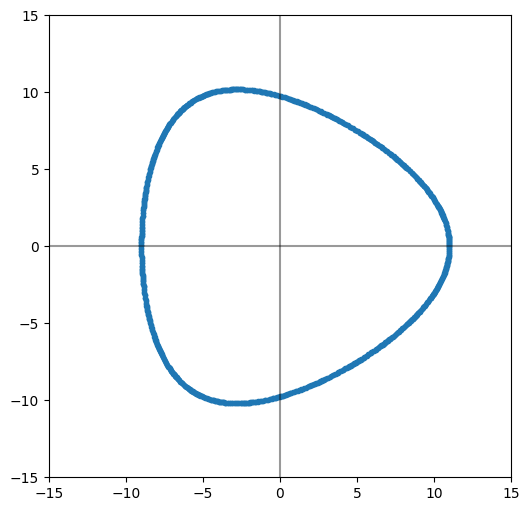

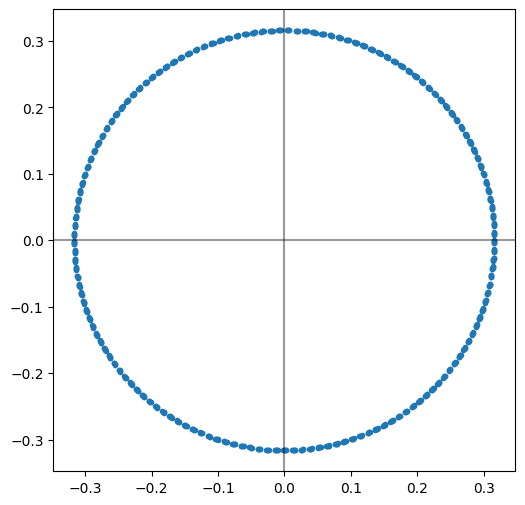

In [8]:

turns = int(1000)
N     = np.arange(0,turns)

Qx    = 0.31025793875089835
Qy    = 0.320264
Jx    = (0.5*(10**2))
Jy    = 1e-3*Jx
psi0  = 0#0.25

mn = [(2,0)]
aj = [0.02*Jx,0.02*Jx,0.02*Jx]
phasors = sum([a*np.exp(1j*(2*np.pi*(m*Qx+n*Qy)*N + 0)) for (m,n),a in zip(mn,aj)])

hx = np.sqrt(2*Jx)*np.exp(-1j*(2*np.pi*Qx*N - psi0)) + phasors
x  = hx.real
px = hx.imag

hy = np.sqrt(2*Jy)*np.exp(-1j*(2*np.pi*Qy*N - psi0))
y  = hy.real
py = hy.imag

plt.figure(figsize=(6,6))
plt.plot(x,px,'.')
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-15,15])
plt.ylim([-15,15])


plt.figure(figsize=(6,6))
plt.plot(y,py,'.')
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
# plt.xlim([-15,15])
# plt.ylim([-15,15])
# 

In [21]:
SS = Sussix()
SS.sussix_inp(nt1   = 1, 
              nt2   = turns,
              idam  = 2,
              ir    = 1,
              tunex = 0.31,
              tuney = 0.32,
              istun = None,
              nline = 0)


SS.sussix(x,px,y,py,0*x,0*x)
df = pd.DataFrame({'ax':SS.ax,'ox':SS.ox,'ay':SS.ay,'oy':SS.oy})#,'y':y,'py':py})
# df = df[df.ox>0]
# df.sort_values('ox',inplace=True)
# df = df.reset_index(drop=True)
df.head(10)

 X TUNE DIFFERENT FROM EXPECTED


,ax,ox,ay,oy
0,5.002899,0.310258,1.581137e-01,0.320264
1,5.007995,-0.310258,1.582773e-01,-0.320264
2,0.503179,0.059190,1.757492e-04,-0.320191
3,0.502490,-0.059189,6.901820e-06,-0.320886
4,0.500678,0.379483,4.626237e-06,-0.319635
5,0.500605,-0.379484,1.825729e-06,-0.321504
6,0.499136,0.069226,9.557525e-07,-0.318828
7,0.498463,-0.069226,4.415383e-07,-0.322469
8,0.022146,-0.058571,4.138144e-07,-0.320233
9,0.022192,0.058583,3.397384e-07,-0.318185


 -0.31025774459182320       0.31000000000000000     
 EXPECTED TUNE X FOUND AT LINE           2
 Y TUNE DIFFERENT FROM EXPECTED
 -0.32026391367161988       0.32000000000000001     
 EXPECTED TUNE Y FOUND AT LINE           2


In [148]:
Q,A

(array([0.31025794, 0.06922619, 0.37948412, 0.44871031]),
 array([5.  , 0.5 , 0.5 , 0.25]))

/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_28559/3040088077.py:25: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)


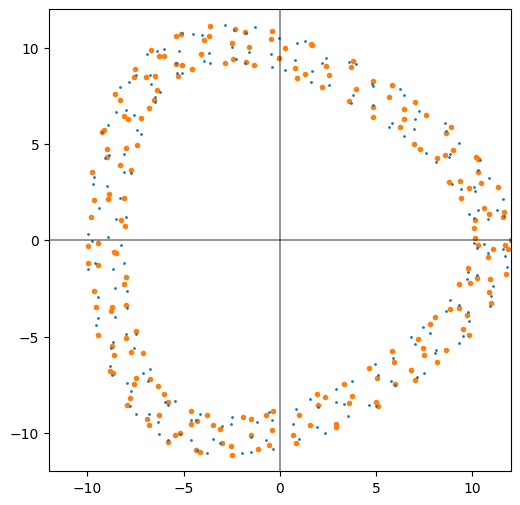

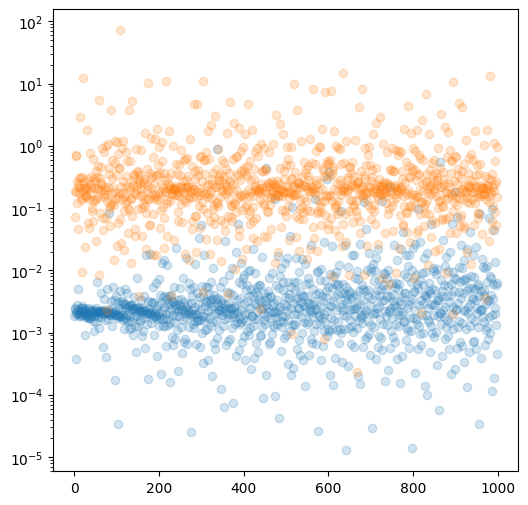

In [19]:
n_phasors = 4
selected_phasors = [0,2]
# selected_phasors = [0,2,4,7]
selected_phasors = [0,2,5,6]
# reconstructed = sum([_ax*np.exp(1j*(2*np.pi*(_ox)*N )) for _ax,_ox in zip(df.ax[:n_phasors],df.ox[:n_phasors])])
reconstructed = sum([2*_ax*np.exp(-1j*(2*np.pi*(_ox)*N  )) for _ax,_ox in zip(df.ax[selected_phasors],df.ox[selected_phasors])])


x_r  = reconstructed.real
px_r = reconstructed.imag

show_turn = 200
plt.figure(figsize=(6,6))
plt.plot(x_r[:show_turn],px_r[:show_turn],'.',color='C1')
plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-12,12])
plt.ylim([-12,12])

plt.figure(figsize=(6,6))
plt.plot(np.abs((x-x_r)/x),'o',alpha=0.2)
plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)
plt.yscale('log')

/var/folders/yf/hpn77ycx7h50r6rt81q7lghr0000gn/T/ipykernel_28559/1339396323.py:55: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)


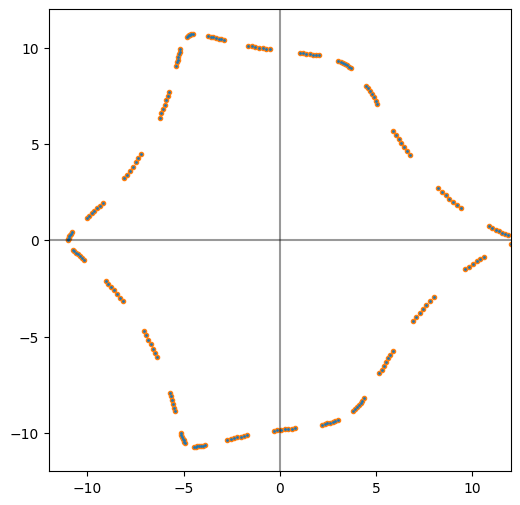

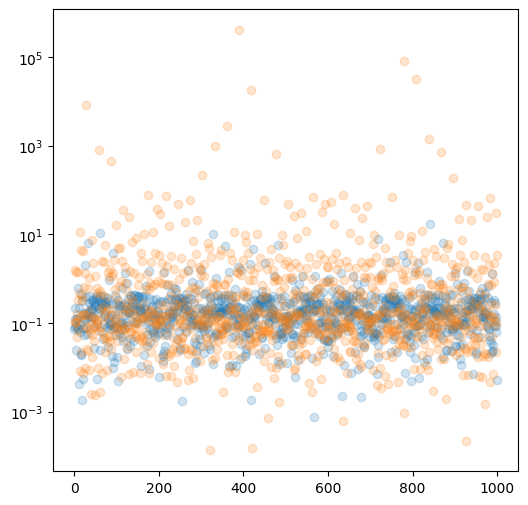

In [56]:
import NAFFlib
def NAFFlib_tune(x,nfreqs = 1,Hann_order=2,multiparticles = False):

    

    # No need to remove average, already done.
    if multiparticles:
        x = np.array(x)
        Q = NAFFlib.multiparticle_tunes(x, order=Hann_order)

        Q[Q<0] = np.nan
        return Q

    else:
        x        = np.array(x)
        Q,A,An  = NAFFlib.get_tunes(x, nfreqs, Hann_order)
        # Q,A      = NAFFlib.get_tunes_all(x, nfreqs, Hann_order)

        # np.abs(Ap[i]) is the amplitude
        if nfreqs ==1:
            return Q[0]
        else:
            # return Q,np.abs(Ap),np.abs(An)
            return Q,np.abs(A)
        


Q,A = NAFFlib_tune(x,nfreqs=4,Hann_order=2,multiparticles = False)


# n_phasors = 4
# selected_phasors = [0,2]
# selected_phasors = [0,2,4,6]
# reconstructed = sum([_ax*np.exp(1j*(2*np.pi*(_ox)*N )) for _ax,_ox in zip(df.ax[:n_phasors],df.ox[:n_phasors])])
reconstructed = sum([2*_ax*np.exp(-1j*(2*np.pi*(_ox)*N  )) for _ax,_ox in zip(A,Q)])


x_naff  = reconstructed.real
px_naff = reconstructed.imag

show_turn = 200
plt.figure(figsize=(6,6))
plt.plot(x_naff[:show_turn],px_naff[:show_turn],'.',color='C1')
plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)
# plt.plot(hx.real,hx.imag,'.',ms=2)
plt.axhline(0,color='k',alpha=0.4)
plt.axvline(0,color='k',alpha=0.4)
plt.axis('square');
plt.xlim([-12,12])
plt.ylim([-12,12])


plt.figure(figsize=(6,6))
plt.plot(np.abs((x-x_r)/x),'o',alpha=0.2)
plt.plot(np.abs((px-px_r)/px),'o',alpha=0.2)
plt.yscale('log')

In [54]:
results = pd.DataFrame({'A':A,'Q':Q})
display(results)

mn = [(1,0),(2,0),(3,0),(2,1)]
aj = [2*Jx,0.02*Jx,0.02*Jx,0.02*Jx]
# start = pd.DataFrame({'aj':np.sqrt(2*np.array(aj))})
# display(start)
[(np.sqrt(a)/2,m*Qx+n*Qy) for (m,n),a in zip(mn,aj)]


,A,Q
0,5.0,0.310258
1,0.5,0.069226
2,0.5,0.059220
3,0.5,0.379484


[(5.0, 0.31025793875089835),
 (0.5, 0.6205158775017967),
 (0.5, 0.9307738162526951),
 (0.5, 0.9407798775017967)]

0.320264